In [18]:
### fashion_mnist_mlp

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
import numpy as np
import matplotlib.pyplot as plt

In [102]:
fashion_mnist = keras.datasets.fashion_mnist
(trainimage, trainlabel), (testimage, testlabel) = fashion_mnist.load_data()

In [49]:
classnames = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal','shirt', 'sneaker',
             'bag', 'ankle boot']

In [103]:
print(trainimage.shape, trainlabel.shape) 
print(testimage.shape, testlabel.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


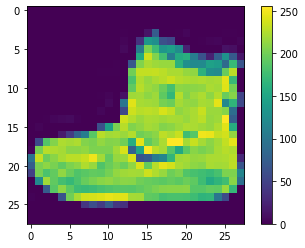

In [11]:
plt.figure()
plt.imshow(trainimage[0])
plt.colorbar()
plt.show()

In [104]:
# trainimage = trainimage/255.0
# testimage = testimage/255.0

In [107]:
trainimage = trainimage.reshape((60000,28*28)).astype('float32')/255.0
testimage = testimage.reshape((10000,28*28)).astype('float32')/255.0

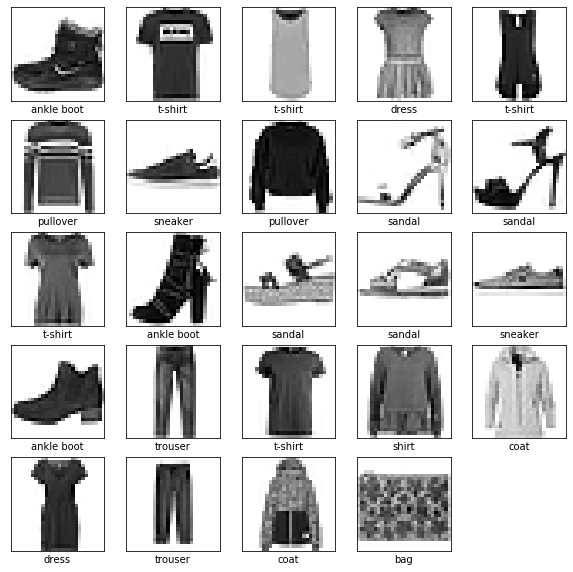

In [105]:
plt.figure(figsize=(10,10))

for i in range(0,24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainimage[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[trainlabel[i]])
plt.show()

In [27]:
# from keras.utils import to_categorical
# trainlabel = to_categorical(trainlabel)
# testlabel = to_categorical(testlabel)

In [108]:
model = Sequential()

model.add(Dense(512, input_shape=(28*28,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(trainimage, trainlabel, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.9942 - accuracy: 0.6370
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.6005 - accuracy: 0.7807
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.5361 - accuracy: 0.8058
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.4936 - accuracy: 0.8234
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4639 - accuracy: 0.8336


In [109]:
model.evaluate(testimage, testlabel)[1]

10000/10000 [==============================] - 1s 84us/step


0.8274000287055969

In [58]:
classnames[np.argmax(model.predict(testimage)[0])]

'ankle boot'

In [ ]:
### fashion_mnist_cnn

In [60]:
from keras.preprocessing.image import *
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import random
import os
import pandas as pd
import numpy as np

In [76]:
fashion_mnist = keras.datasets.fashion_mnist
(trainimage, trainlabel), (testimage, testlabel) = fashion_mnist.load_data()

In [77]:
print(trainimage.shape, trainlabel.shape) 
print(testimage.shape, testlabel.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [118]:
trainimage = trainimage.reshape(trainimage.shape[0],28,28,1)/255.0
testimage = testimage.reshape(testimage.shape[0],28,28,1)/255.0

In [78]:
# trainimage = trainimage/255.0
# testimage = testimage/255.0

In [119]:
print(trainimage.shape, trainlabel.shape) 
print(testimage.shape, testlabel.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [130]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [131]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
es = EarlyStopping(patience=5)

lrreduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, min_lr=0.00001, verbose=1)

callbacks = [es, lrreduction]

In [133]:
model.fit(trainimage, trainlabel, epochs=10, batch_size=128, callbacks=callbacks)

Epoch 1/10
60000/60000 [==============================] - 206s 3ms/step - loss: 2.3161 - accuracy: 0.1450


C:\Users\student\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\student\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
60000/60000 [==============================] - 201s 3ms/step - loss: 1.5305 - accuracy: 0.4380
Epoch 3/10
60000/60000 [==============================] - 204s 3ms/step - loss: 1.0375 - accuracy: 0.6087
Epoch 4/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.8693 - accuracy: 0.6713
Epoch 5/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.7895 - accuracy: 0.7039
Epoch 6/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.7384 - accuracy: 0.7235
Epoch 7/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.7051 - accuracy: 0.7405
Epoch 8/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.6785 - accuracy: 0.7533
Epoch 9/10
60000/60000 [==============================] - 213s 4ms/step - loss: 0.6476 - accuracy: 0.7650
Epoch 10/10
60000/60000 [==============================] - 221s 4ms/step - loss: 0.6335 - accuracy: 0.7686


In [136]:
model.evaluate(testimage, testlabel)[1]

10000/10000 [==============================] - 18s 2ms/step


0.5712000131607056